# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Matthew Nathan Limahardja
- **Email:** nathanlimahardja@gmail.com
- **ID Dicoding:** nathan_limahardja

## Menentukan Pertanyaan Bisnis
- Bagaimana performa penjualan dalam beberapa bulan terakhir?
- Bagaimana setiap season mempengaruhi jumlah user?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd

## Data Wrangling
### Gathering Data

In [3]:
day_df = pd.read_csv('data/day.csv')
day_df.sample(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
551,552,2012-07-05,3,1,7,0,4,1,1,0.827500,0.761367,0.457917,0.194029,1405,4836,6241
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
590,591,2012-08-13,3,1,8,0,1,1,1,0.720833,0.662254,0.545417,0.136212,1207,5676,6883
694,695,2012-11-25,4,1,11,0,0,0,1,0.245833,0.257583,0.468333,0.150500,309,2115,2424
154,155,2011-06-04,2,0,6,0,6,0,1,0.635000,0.594696,0.456250,0.123142,1869,3473,5342
684,685,2012-11-15,4,1,11,0,4,1,2,0.321667,0.324492,0.620417,0.152987,320,5125,5445
332,333,2011-11-29,4,0,11,0,2,1,2,0.458333,0.451375,0.830833,0.258092,96,2818,2914
519,520,2012-06-03,2,1,6,0,0,0,1,0.602500,0.575133,0.493333,0.184087,2494,5147,7641
214,215,2011-08-03,3,0,8,0,3,1,2,0.731667,0.679937,0.657500,0.135583,467,3107,3574
67,68,2011-03-09,1,0,3,0,3,1,2,0.295833,0.286608,0.775417,0.220150,191,1700,1891


### Assessing Data

In [4]:
day_df.info()
print("Jumlah duplikasi: ", day_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
Jumlah duplikasi:  0


### Cleaning Data

In [5]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Tidak ada duplicate, missing values
- Data type masing masing kolom sudah benar kecuali dteday

## Exploratory Data Analysis (EDA)

### Explore `day_df`

In [6]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [7]:
day_by_weathersit = day_df.groupby(['weathersit']).agg({
    'temp': 'mean',
    'atemp': 'mean',
    'hum': 'mean',
    'windspeed': 'mean'
}).reset_index()
print(day_by_weathersit)

   weathersit      temp     atemp       hum  windspeed
0           1  0.511541  0.488596  0.565594   0.190253
1           2  0.470366  0.452868  0.725887   0.186431
2           3  0.433440  0.413064  0.848872   0.243336


In [8]:
day_by_year = day_df.groupby(by='yr').agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum',
}).reset_index()
print(day_by_year)

   yr  casual  registered      cnt
0   0  247252      995851  1243103
1   1  372765     1676811  2049576


**Insight:**
- Temperatur tertinggi pada season 3
- Terjadi peningkatan user pada tahun berikutnya

## Visualization

### Pertanyaan 1: Bagaimana keadaan lingkungan terhadap situasi weather?

<Axes: xlabel='weathersit'>

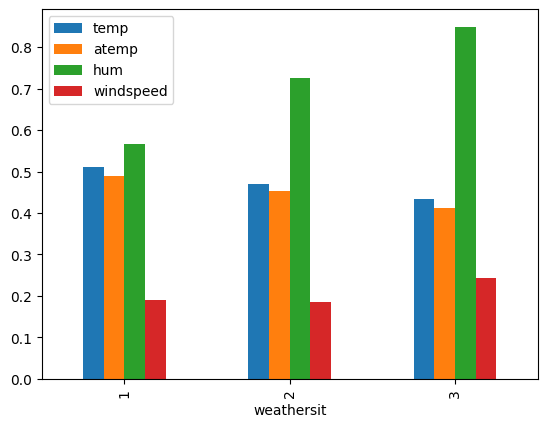

In [9]:
day_by_weathersit.plot(kind='bar', x='weathersit', y=['temp', 'atemp', 'hum', 'windspeed'])

### Pertanyaan 2: Bagaimana performa user setiap tahunnya?

<Axes: xlabel='yr'>

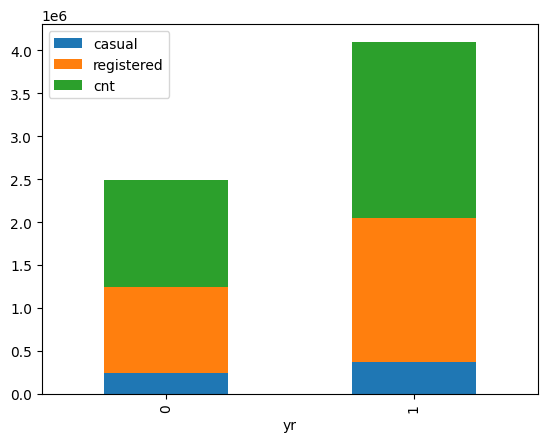

In [10]:
day_by_year.plot(kind='bar', x='yr', y=['casual', 'registered', 'cnt'], stacked=True)

**Insight:**
- Lebih banyak user yang bertipe registered
- Humidity berbeda jauh pada setiap kondisi weather

## Conclusion
- Humidity sangat mempengaruhi situasi weather
- Di tahun berikutnya, performa user meningkat pesat